## Lang Chain Streaming ChatOpenAI

1. Set the streaming=True
2. Add the StreamingStdOutCallbackHandler() into ChatOpenAI

Learn more about the invoke method

messages: list, string or PromptValue

<!-- 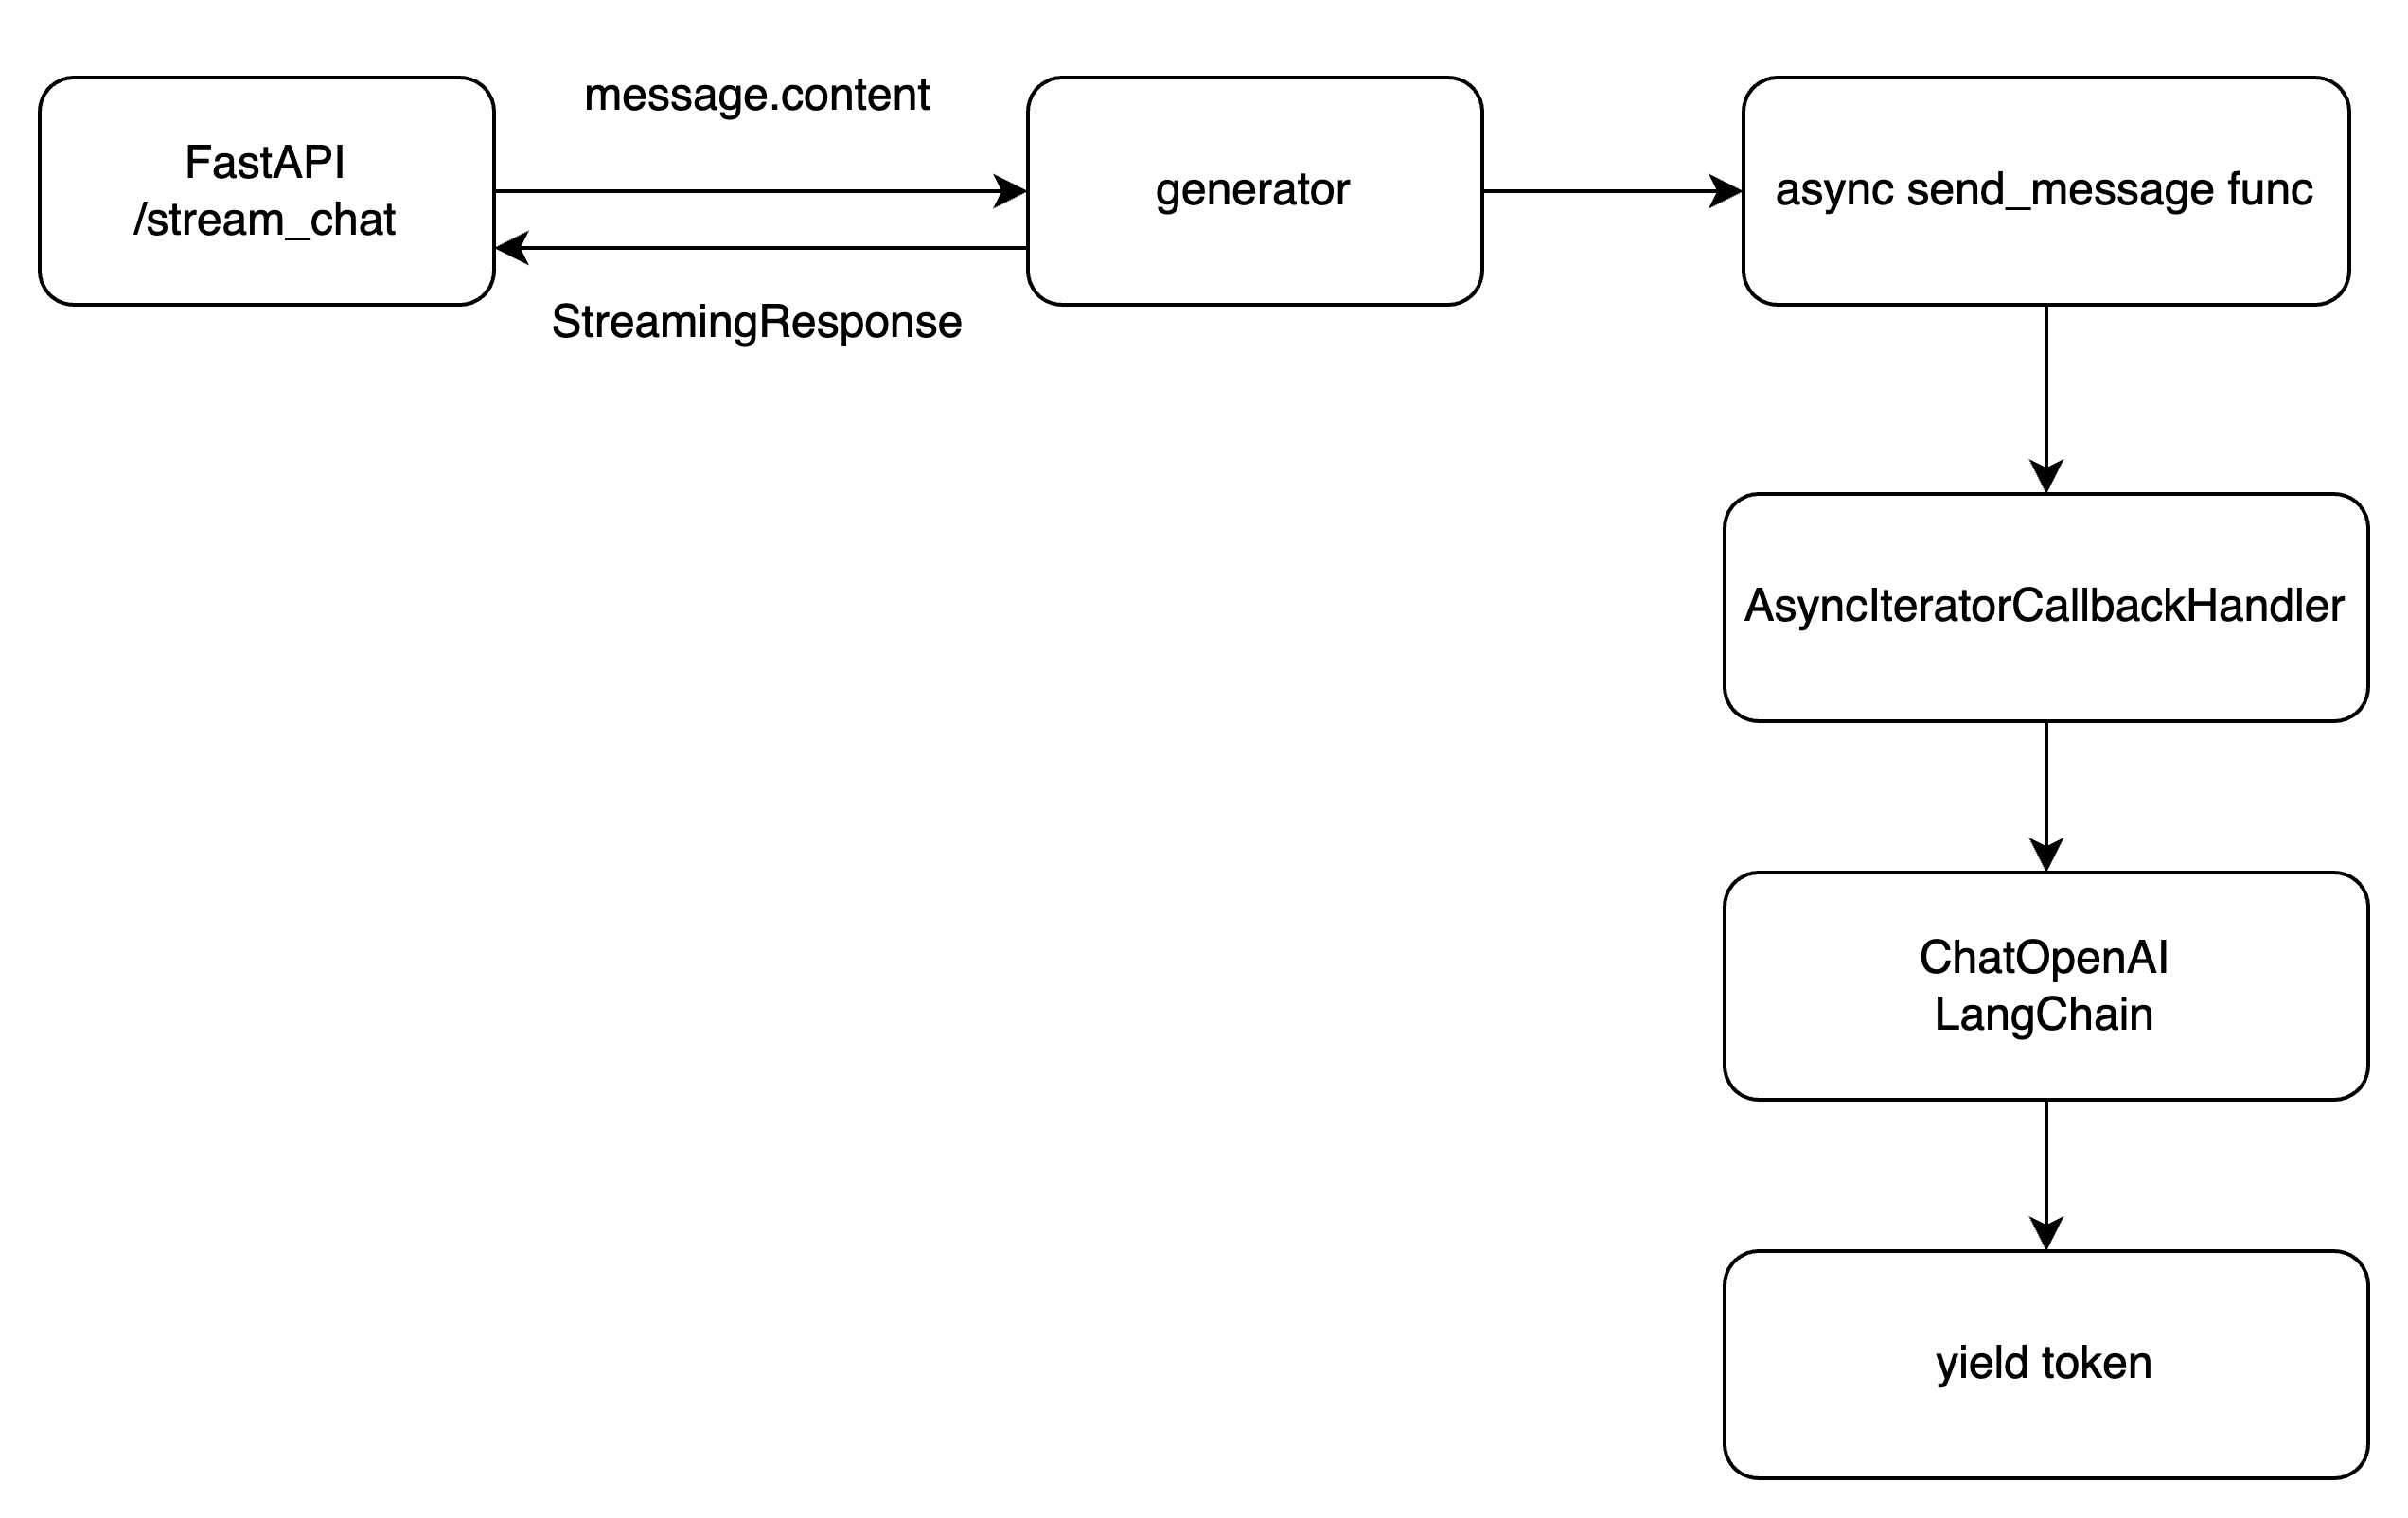 -->

<img src=attachment:f3467711-fa21-4abf-a4f2-afd71abdd930.png width="720" height="320" alt="My Image">

Use HumanMessage

In [ ]:
from dotenv import load_dotenv
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain_core.messages import HumanMessage, SystemMessage

load_dotenv()

chat = ChatOpenAI(
    streaming=True, callbacks=[StreamingStdOutCallbackHandler()], temperature=0
)

messages = [HumanMessage(content="Tell a long story")]

print(chat.invoke(messages))

Use SystemMessage and HumanMessage

In [4]:
from dotenv import load_dotenv
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain_core.messages import HumanMessage, SystemMessage

load_dotenv()

chat = ChatOpenAI(
    streaming=True, callbacks=[StreamingStdOutCallbackHandler()], temperature=0
)

messages = [SystemMessage(content="You are a helpful assistant! Your name is Bob."), HumanMessage(content="What is your name?")]

print(chat.invoke(messages))

Hello! My name is Bob. How can I assist you today?content='Hello! My name is Bob. How can I assist you today?' response_metadata={'finish_reason': 'stop'} id='run-32269d74-fd28-4ad2-a956-ba9cff36ac6f-0'


Use directly the string

In [5]:
from dotenv import load_dotenv
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

load_dotenv()

chat = ChatOpenAI(
    streaming=True, callbacks=[StreamingStdOutCallbackHandler()], temperature=0
)

print(chat.invoke("hello there"))

Hello! How can I assist you today?content='Hello! How can I assist you today?' response_metadata={'finish_reason': 'stop'} id='run-cebdd7c1-3206-4f4c-a803-d23442d1572b-0'


## Test the stream chat


The end parameter in the print() function specifies what should be printed at the end of the output.
By default, print() adds a newline character \n at the end of the output.
By setting end='', we're telling print() to not add a newline character, but instead, just print the decoded chunk and keep the cursor on the same line.



## Get the streaming from FastAPI

In [13]:
import json
import requests

url = "http://localhost:7000/stream_chat"
message = "Hello, how are you?"
data = {"content": message}

headers = {"Content-type": "application/json"}

result = ""
with requests.post(url, data=json.dumps(data), headers=headers, stream=True) as r:
    for chunk in r.iter_content(1024):
        try:
            # Attempt to decode the chunk as text
                print(chunk.decode('utf-8'), end='')
        except UnicodeDecodeError:
            # If the chunk is not text, print it as is
            print(chunk, end='')

Hello! I'm just a computer program, so I don't have feelings, but I'm here to help you. How can I assist you today?

## Get the streaming from OpenAI 

- streaming = False
- streaming = True

In [14]:
import requests
import os

url = "https://api.openai.com/v1/chat/completions"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {os.environ['OPENAI_API_KEY']}"
}

data = {
    "model": "gpt-4o-mini",
    "messages": [
        {
            "role": "system",
            "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."
        },
        {
            "role": "user",
            # "content": "Compose a poem that explains the concept of recursion in programming."
            "content": "hello world"
        }
    ]
}

response = requests.post(url, headers=headers, json=data)
print(response.json())

{'id': 'chatcmpl-9o0wpMOZOr1eTGJBxw3PRVOctZI7C', 'object': 'chat.completion', 'created': 1721707071, 'model': 'gpt-4o-mini-2024-07-18', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'In the realm of coding, with syntax so bright,  \n"Hello, World!" emerges, a beacon of light.  \nA simple beginning, where journeys commence,  \nIn the language of logic, it leaps from the fence.  \n\nWith lines of pure magic, your script comes to life,  \nA greeting familiar, cutting through strife.  \nFrom Python to Java, in C# it gleams,  \n"Hello, World!" whispers, igniting our dreams.  \n\nSo type it with fervor, let echoes resound,  \nIn every new program, where wonders abound.  \nFor each line of code holds a story untold,  \nAnd "Hello, World!" is where genius unfolds.'}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 29, 'completion_tokens': 142, 'total_tokens': 171}, 'system_fingerprint': 'fp_661538dc1f'}


In [15]:
from pprint import pprint
pprint(response.json())

{'choices': [{'finish_reason': 'stop',
              'index': 0,
              'logprobs': None,
              'message': {'content': 'In the realm of coding, with syntax so '
                                     'bright,  \n'
                                     '"Hello, World!" emerges, a beacon of '
                                     'light.  \n'
                                     'A simple beginning, where journeys '
                                     'commence,  \n'
                                     'In the language of logic, it leaps from '
                                     'the fence.  \n'
                                     '\n'
                                     'With lines of pure magic, your script '
                                     'comes to life,  \n'
                                     'A greeting familiar, cutting through '
                                     'strife.  \n'
                                     'From Python to Java, in C# it gleams,  \

In [17]:
print(response.json()['choices'][0]['message']['content'])

In the realm of coding, with syntax so bright,  
"Hello, World!" emerges, a beacon of light.  
A simple beginning, where journeys commence,  
In the language of logic, it leaps from the fence.  

With lines of pure magic, your script comes to life,  
A greeting familiar, cutting through strife.  
From Python to Java, in C# it gleams,  
"Hello, World!" whispers, igniting our dreams.  

So type it with fervor, let echoes resound,  
In every new program, where wonders abound.  
For each line of code holds a story untold,  
And "Hello, World!" is where genius unfolds.


### Use the streaming 

Reference: https://cookbook.openai.com/examples/how_to_stream_completions

add the streaming=True in requests.post and 

Data of each chunk
```
{
    "id": "chatcmpl-9o1AJdo3soFyADAL1J5902XlT0PD6",
    "object": "chat.completion.chunk",
    "created": 1721707907,
    "model": "gpt-4o-mini-2024-07-18",
    "system_fingerprint": "fp_661538dc1f",
    "choices": [
        {
            "index": 0,
            "delta": {
                "content": " learning"
            },
            "logprobs": null,
            "finish_reason": null
        }
    ]
}
```

Tricky ở chỗ parse string từ vị trí thứ 6 sau đó chuyển thành JSON

In [57]:
import requests
import os
import ast
import json

# String representation of a dictionary
dict_str = "{'name': 'John', 'age': 30, 'city': 'New York'}"

# Convert the string to a dictionary
my_dict = (dict_str)


url = "https://api.openai.com/v1/chat/completions"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {os.environ['OPENAI_API_KEY']}"
}

data = {
    "model": "gpt-4o-mini",
    "messages": [
        {
            "role": "system",
            "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."
        },
        {
            "role": "user",
            # "content": "Compose a poem that explains the concept of recursion in programming."
            "content": "hello world"
        }
    ],
    "stream": True,     # remember to add this stream = True,
    "temperature": 0
}

response = requests.post(url, json=data, headers=headers, stream=True)
for chunk in response.iter_lines():
    # check whether each line is non-empty
    if chunk.decode() :
      chunk = chunk.decode()
      # decode each line as response data is in bytes
      if len(chunk) > 12 and "content" in json.loads(chunk[6:])['choices'][0]['delta']:
          # print(chunk)
          # print(type(chunk))
          partial_words = json.loads(chunk[6:])['choices'][0]["delta"]["content"]
          print(partial_words, end="")

In the realm of code, where logic takes flight,  
"Hello, World!" emerges, a beacon of light.  
A simple phrase, yet profound in its grace,  
The first step in programming, a warm, friendly face.  

With a flick of the keys, you summon the screen,  
A message so basic, yet it feels like a dream.  
In languages many, from Python to C,  
This greeting unites us, you and me.  

So let’s raise our voices, let our spirits unfurl,  
In the vast world of coding, we say, “Hello, World!”  
A journey begins with this humble decree,  
In the heart of the code, we find unity.